In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('../data/gdp_percapita.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


#4 Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df.
#Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [3]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')
print (gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]


#5 How many rows and columns are in gdp_df? What are the data types of each column?


In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


#6 Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [5]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [6]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country","Value":"GDP_Per_Capita"})
gdp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


7 How many countries have data for all years? Which countries are missing many years of data?
#Look at the number of observations per year. What do you notice?


In [7]:
print(min(gdp_df.Year))
print(max(gdp_df.Year))

1990
2023


In [8]:
countries = gdp_df.groupby('Country')['Year'].count().reset_index()

In [9]:
countries.max()

Country    Zimbabwe
Year             34
dtype: object

In [10]:
countries[countries['Year'] == 34].count()

Country    228
Year       228
dtype: int64

In [11]:
countries[countries['Year']<34].count()

Country    19
Year       19
dtype: int64

In [12]:
countries_missing_data=countries[countries['Year']<34]

In [13]:
countries_missing_data

,Country,Year
0,Afghanistan,24
23,Bhutan,33
37,Cayman Islands,18
48,CuraÃ§ao,24
54,Djibouti,11
73,Faroe Islands,16
83,Greenland,32
115,Kosovo,16
125,Lebanon,33
152,Montenegro,27


In [15]:
gdp_df.groupby("Year")["Country"].count()

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
Name: Country, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section.
Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare 
and what information can you get out of one type that you can't necessarily get out of the others?


In [16]:
gdp_2020=gdp_df.loc[gdp_df["Year"]==2020,["GDP_Per_Capita"]]
gdp_2020#.reset_index(drop=True)

      GDP_Per_Capita
3        2769.685745
27       3861.111238
61       4622.731427
95      14650.395929
129     14194.155748
...              ...
8068    45055.782930
8090     5423.682547
8120    18600.986362
8154     3391.595412
8188     2987.269823

[247 rows x 1 columns]


(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

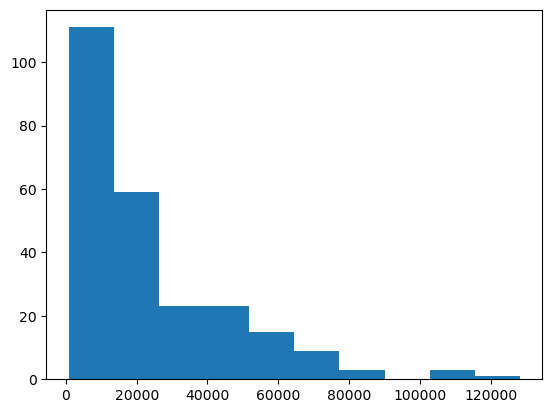

In [17]:
plt.hist(gdp_2020)

<Axes: ylabel='Density'>

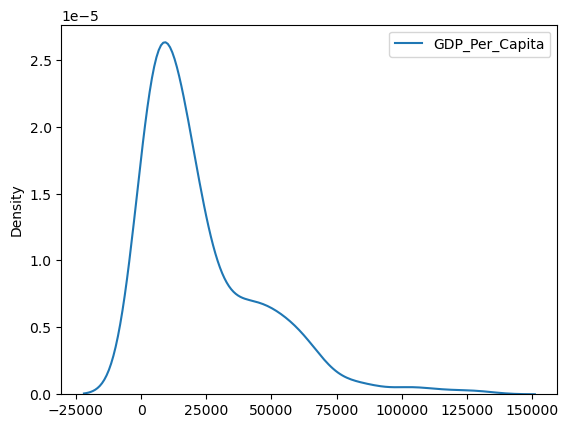

In [18]:
sns.kdeplot(gdp_2020)

{'whiskers': [<matplotlib.lines.Line2D at 0x16b4d951310>,
 'caps': [<matplotlib.lines.Line2D at 0x16b4d951590>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b4d9511d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16b4d951810>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b4d951950>],
 'means': []}

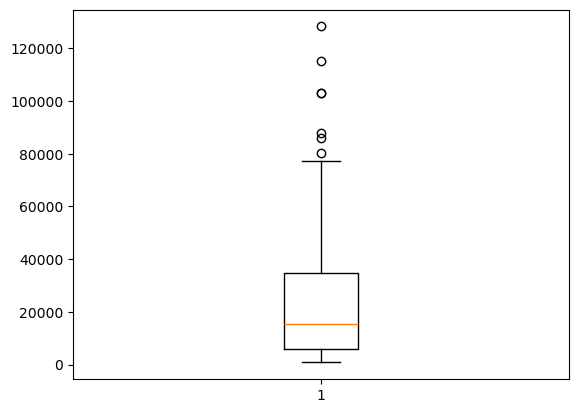

In [19]:
plt.boxplot(gdp_2020)

<Axes: >

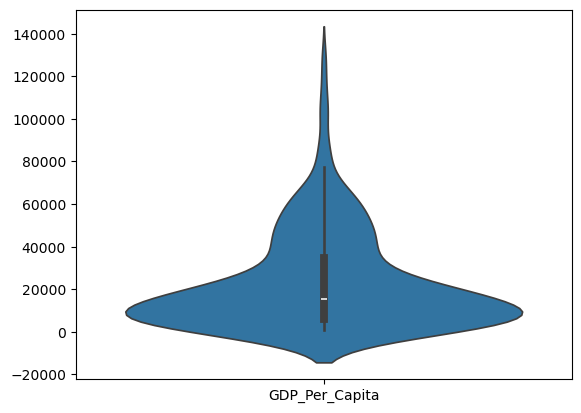

In [20]:
sns.violinplot(gdp_2020)

9. What was the median GDP per capita value in 2020?


In [21]:
median_gdp_2020=gdp_df.loc[gdp_df["Year"]==2020,["GDP_Per_Capita"]]
print(median_gdp_2020.median())
#gdp_2020['GDP_Per_Capita'].median()
#gdp_2020.GDP_Per_Capita.median()

GDP_Per_Capita    15309.235988
dtype: float64


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [22]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin([1990, 2000, 2010, 2020])]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
13                    Afghanistan  2010     2848.586061
23                    Afghanistan  2000     1617.826475
27    Africa Eastern and Southern  2020     3861.111238
37    Africa Eastern and Southern  2010     3863.836012
...                           ...   ...             ...
8184                       Zambia  1990     2425.111287
8188                     Zimbabwe  2020     2987.269823
8198                     Zimbabwe  2010     2572.769992
8208                     Zimbabwe  2000     4071.022001
8218                     Zimbabwe  1990     4013.299059

[965 rows x 3 columns]


Box plot for the years 1990,2000,2010,2020

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

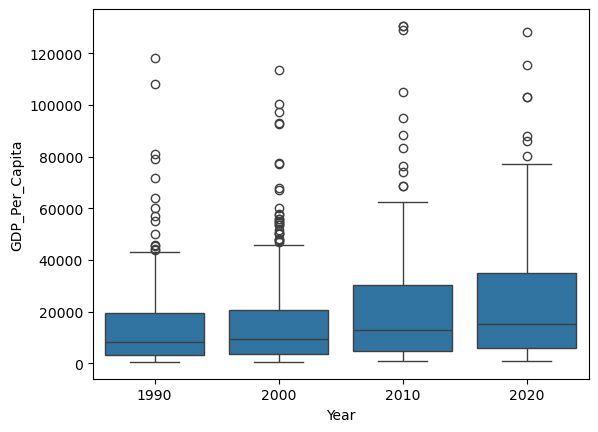

In [23]:
sns.boxplot(data=gdp_decades, x = 'Year', y= 'GDP_Per_Capita')

Barplot for the years

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

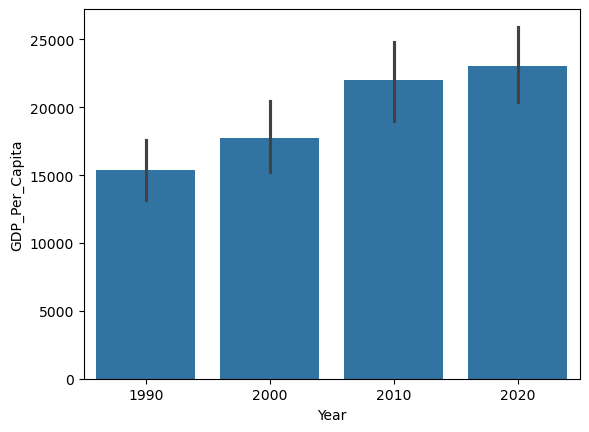

In [24]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

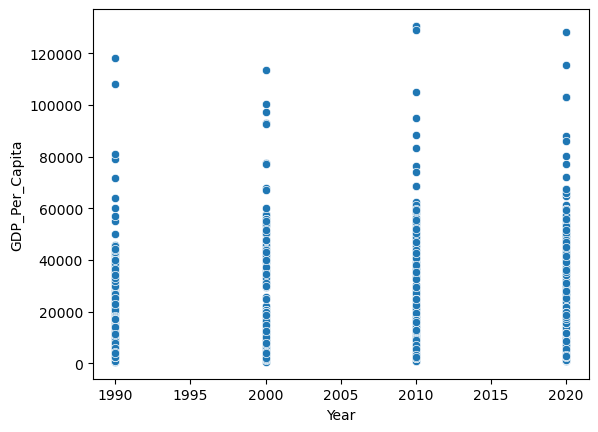

In [25]:
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

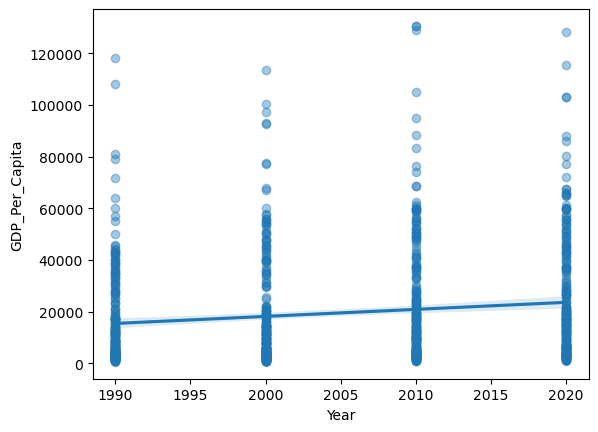

In [26]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, scatter_kws={'alpha':0.4})

11. Which country was the first to have a GDP per capita greater than $100,000?


#11. # 1. Filtering for GDP per capita > $100,000
high_gdp_countries = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

# 2. Sorting by 'Year' to find the earliest occurrence
first_high_gdp_country_row = high_gdp_countries.sort_values(by='Year').iloc[0]

# 3. Extracting the country name
first_country = first_high_gdp_country_row['Country']
first_year = first_high_gdp_country_row['Year']
first_gdp = first_high_gdp_country_row['GDP_Per_Capita']

In [27]:
gdp_over_100k=gdp_df.loc[gdp_df["GDP_Per_Capita"]>100000]
gdp_over_100k.loc[gdp_over_100k.Year==gdp_over_100k.Year.min()]

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [ ]:
#df.loc[(df['Age'] > 25) & (df['City'] == 'New York')]
high_gdp_country=gdp_df.loc[gdp_df["Year"]==2020]
#print(high_gdp_country)
top_gdp=high_gdp_country.sort_values("GDP_Per_Capita",ascending=False)
print(top_gdp)
#high_gdp_country.loc[high_gdp_country.Country==high_gdp_country.GDP_Per_Capita.max()]

In [ ]:
#plt.plot(gdp_df["Country"]=="Luxembourg",gdp_df["Year"])
gdp_lux=gdp_df.loc[gdp_df["Country"] == "Luxembourg",["Year","GDP_Per_Capita"]]
plt.plot(gdp_lux["Year"],gdp_lux["GDP_Per_Capita"])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [ ]:
low_gdp_country=gdp_df.loc[gdp_df["Year"]==2020]
#print(high_gdp_country)
bottom_gdp=high_gdp_country.sort_values("GDP_Per_Capita")
print(bottom_gdp)

In [ ]:
gdp_bur=gdp_df.loc[gdp_df["Country"] == "Burundi",["Year","GDP_Per_Capita"]]
plt.plot(gdp_bur["Year"],gdp_bur["GDP_Per_Capita"])

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [ ]:
internet_df=pd.read_csv('../data/internet_use.csv', on_bad_lines='skip',engine='python',skipfooter=299)
print(internet_df)
internet_df.dtypes


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [ ]:
internet_df=internet_df.drop(columns = ['Value Footnotes'])
internet_df=internet_df.rename(columns={"Country or Area":"Country","Value":"Internet_Users_Pct"})
print(internet_df)

16. Look at the number of observations in this dataset per year. What do you notice?


In [ ]:
internet_obs=internet_df.Year.value_counts().reset_index()
sorted_internet_obs=internet_obs.sort_values("Year")
#sns.barplot(x='Year', y='count', data=internet_obs)

17. What is the first year to have a non-zero internet users percentage value?


In [ ]:
internet_df.loc[internet_df["Internet_Users_Pct"]!=0].sort_values("Year")

18. How does the distribution of internet users percent differ for 2000 and 2014?


In [ ]:
internet_2000_2014=internet_df.loc[internet_df.Year.isin([2000,2014])]
 

In [ ]:
sns.boxplot(data = internet_2000_2014, x = 'Year', y = 'Internet_Users_Pct')

In [ ]:
sns.scatterplot(x='Year', y='Internet_Users_Pct', data=internet_2000_2014)

19. For how many countries was the percentage of internet users below 5% in 2014?


In [ ]:
internet_df.loc[(internet_df.Year == 2014) & (internet_df.Internet_Users_Pct < 5),["Country"]].count()


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [ ]:
gdp_and_internet_use=pd.merge(gdp_df, internet_df, on=['Country','Year'], how='outer')
print(gdp_and_internet_use)


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [ ]:
top3_country=gdp_and_internet_use.loc[gdp_and_internet_use["Year"]==2014].sort_values("Internet_Users_Pct",ascending=False).Country.head(3)
#top3_country=gdp_and_internet_use.loc[gdp_and_internet_use["Year"]==2014].sort_values("Internet_Users_Pct",ascending=False).head()
print(top3_country)

In [ ]:
top3_2014_gdp=gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top3_country)]


In [ ]:
top_3=sns.FacetGrid(top3_2014_gdp,col="Country")
top_3.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [ ]:
gdp_and_internet_use_2014=gdp_and_internet_use.loc[gdp_and_internet_use["Year"]==2014]
gdp_and_internet_use_2014

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


In [ ]:
sns.scatterplot(data=gdp_and_internet_use_2014,x="GDP_Per_Capita",y="Internet_Users_Pct")

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [ ]:
GDP_group=pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, 3, labels=['Low', 'Medium', 'High'])
print(GDP_group)

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?
